In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Data/AirPassengers.csv")
data.head(4)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129


In [3]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data["Month"] = pd.to_datetime(data["Month"], infer_datetime_format = True)
data = data.set_index(["Month"])
data.head(4)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


Text(0, 0.5, 'Number of Passengers')

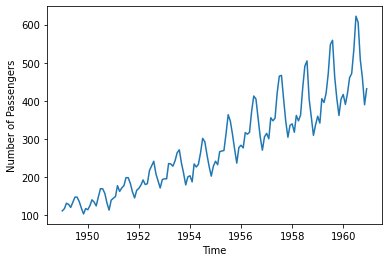

In [8]:
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Number of Passengers")

In [9]:
rolmean = data.rolling(window = 12).mean()
rolstd = data.rolling(window = 12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


Text(0, 0.5, 'Number of Passengers')

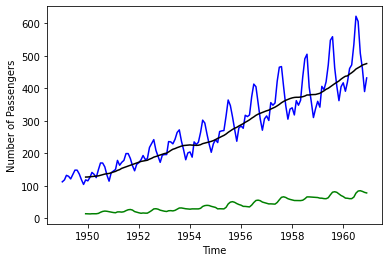

In [10]:
plt.plot(data, color='blue', label='Original data')
plt.plot(rolmean, color='black', label='rolmean')
plt.plot(rolstd, color='green', label='rolstd')
plt.xlabel("Time")
plt.ylabel("Number of Passengers")

In [11]:
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(data["#Passengers"], autolag='AIC')
dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
for key,value in adfTest[4].items():
  dfResults['Critical Value (%s)'%key] = value
print('Augmented Dickey-Fuller Test Results:')
print(dfResults) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Augmented Dickey-Fuller Test Results:
ADF Test Statistic        0.815369
P-Value                   0.991880
# Lags Used              13.000000
# Observations Used     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


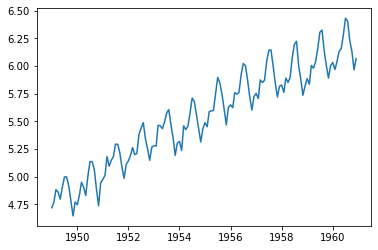

In [12]:
data = np.log(data)
plt.plot(data)

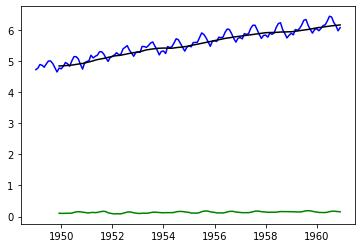

In [13]:
movingavg = data.rolling(window = 12).mean()
movingstd = data.rolling(window = 12).std()
plt.plot(data, color='blue', label='Original data')
plt.plot(movingavg, color='black', label='movingavg')
plt.plot(movingstd, color='green', label='movingstd')

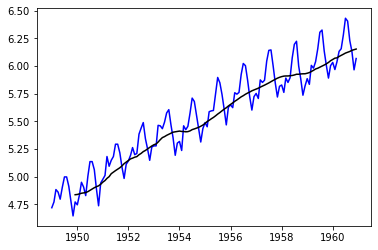

In [14]:
plt.plot(data, color='blue', label='Original data')
plt.plot(movingavg, color='black', label='movingavg')

In [16]:
data = data - movingavg
data.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [17]:
data.dropna(inplace=True)
data.head(4)

,#Passengers
Month,
1949-12-01,-4.901672
1950-01-01,-4.931830
1950-02-01,-4.851413
1950-03-01,-4.749928


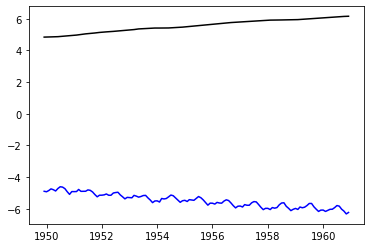

In [18]:
plt.plot(data, color='blue', label='Original data')
plt.plot(movingavg, color='black', label='movingavg')

In [19]:
adfTest = adfuller(data["#Passengers"], autolag='AIC')
dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
for key,value in adfTest[4].items():
  dfResults['Critical Value (%s)'%key] = value
print('Augmented Dickey-Fuller Test Results:')
print(dfResults) 

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -1.621117
P-Value                   0.472144
# Lags Used              13.000000
# Observations Used     119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


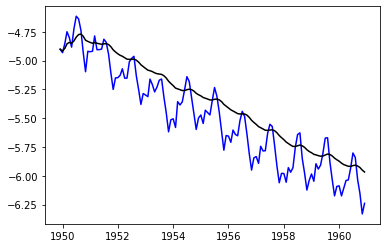

In [21]:
weightedavg = data.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data, color='blue', label='Original data')
plt.plot(weightedavg, color='black', label='weightedavg')

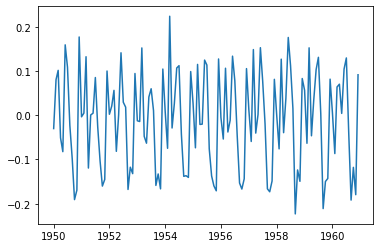

In [22]:
datashift = data - data.shift()
plt.plot(datashift)

In [26]:

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='additive')
trend = result.trend
seasonal = result.seasonal
residual = result.resid
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

            #Passengers
Month                  
1949-12-01          NaN
1950-01-01          NaN
1950-02-01          NaN
1950-03-01          NaN
1950-04-01          NaN
...                 ...
1960-08-01          NaN
1960-09-01          NaN
1960-10-01          NaN
1960-11-01          NaN
1960-12-01          NaN

[133 rows x 1 columns]
            #Passengers
Month                  
1949-12-01    -0.103158
1950-01-01    -0.084402
1950-02-01    -0.122051
1950-03-01     0.016113
1950-04-01    -0.012641
...                 ...
1960-08-01     0.207611
1960-09-01     0.062995
1960-10-01    -0.077310
1960-11-01    -0.218307
1960-12-01    -0.103158

[133 rows x 1 columns]
            #Passengers
Month                  
1949-12-01          NaN
1950-01-01          NaN
1950-02-01          NaN
1950-03-01          NaN
1950-04-01          NaN
...                 ...
1960-08-01          NaN
1960-09-01          NaN
1960-10-01          NaN
1960-11-01          NaN
1960-12-01          NaN

[133 rows x 1 c

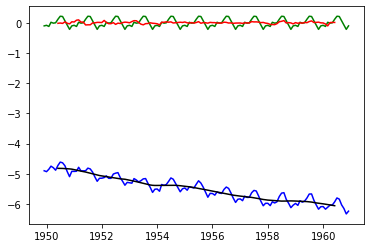

In [25]:
plt.plot(data, color='blue', label='Original data')
plt.plot(trend, color='black', label='trend')
plt.plot(seasonal, color='green', label='seasonal')
plt.plot(residual, color='red', label='residual')